import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings("ignore")


In [2]:
#reading the dataset
df=pd.read_csv('fuel.csv')

In [3]:
#checking first five records
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.columns.to_list()

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [5]:
# clean Column name 
def clean_name(name):
    return name.strip().lower().replace("/", "_per_").replace(" ", "_")


In [6]:
df.rename(columns = clean_name, inplace = True)


In [7]:
df.head()


,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.isna().sum()

modelyear                   0
make                        0
model                       0
vehicleclass                0
enginesize                  0
cylinders                   0
transmission                0
fueltype                    0
fuelconsumption_city        0
fuelconsumption_hwy         0
fuelconsumption_comb        0
fuelconsumption_comb_mpg    0
co2emissions                0
dtype: int64

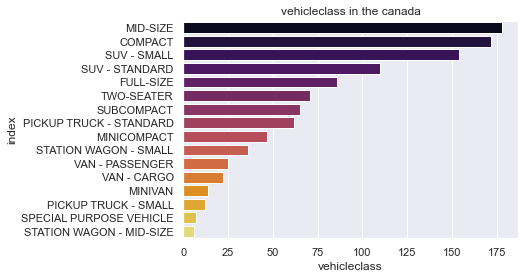

In [11]:
sns.set()
plt.title("vehicleclass in the canada")
sns.barplot(y="index", x = "vehicleclass", data = df.vehicleclass.value_counts().reset_index(), palette="inferno")
plt.show()

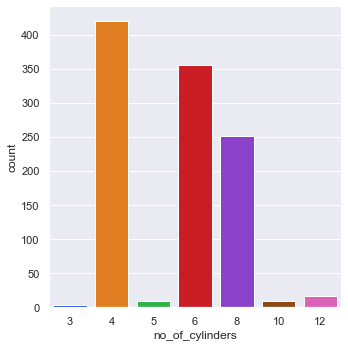

In [12]:
# Calculate No. of cylinders in the car
temp = df.cylinders.value_counts().reset_index().rename(columns = {"index": "no_of_cylinders", "cylinders": "count"})
sns.set()
sns.catplot(x="no_of_cylinders", y ="count", data = temp, kind = "bar", palette="bright")
plt.show()

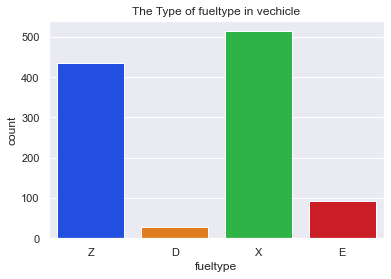

In [14]:
# Checking the fuel type 
sns.set()
plt.title("The Type of fueltype in vechicle")
sns.countplot(df.fueltype, palette="bright")
plt.show()


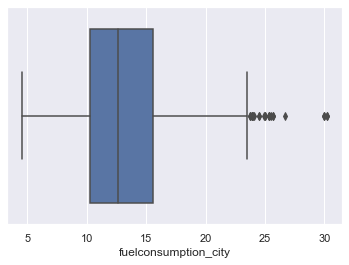

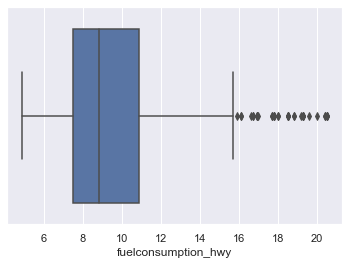

In [17]:
# Checking the fuel_consumption_city_(l_per_100_km)	 
sns.boxplot(df["fuelconsumption_city"])
plt.show ()
sns.boxplot(df["fuelconsumption_hwy"])
plt.show()

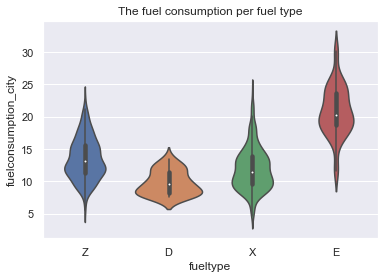

In [21]:
#Checking fuel consumption on highway by type

sns.set()
plt.title("The fuel consumption per fuel type")
sns.violinplot(y="fuelconsumption_city", x = "fueltype", data= df)
plt.show()

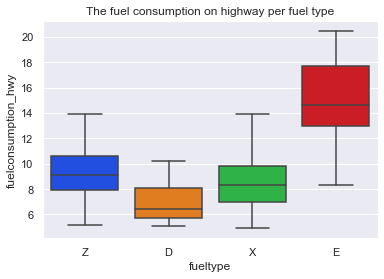

In [22]:
# Checking fuel consumption by type

sns.set()
plt.title("The fuel consumption on highway per fuel type")
sns.boxplot(y="fuelconsumption_hwy", x = "fueltype", data= df, palette="bright", sym = "")
plt.show()

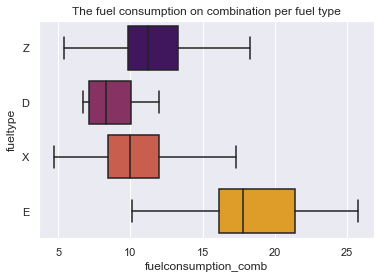

In [23]:
# Checking fuel consumption by type

sns.set()
plt.title("The fuel consumption on combination per fuel type")
sns.boxplot(x="fuelconsumption_comb", y = "fueltype", data= df, palette="inferno", sym = "")
plt.show()

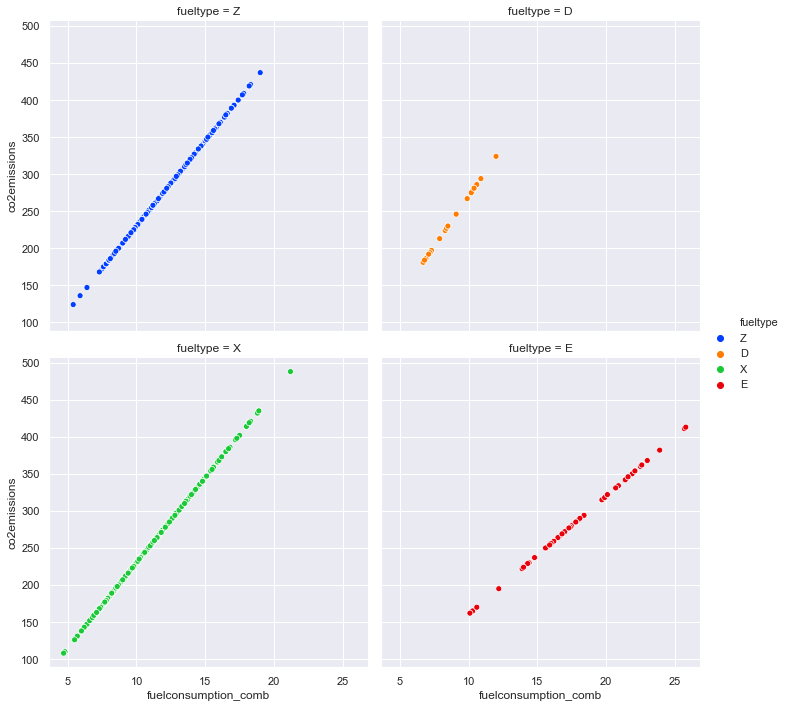

In [27]:
# checking the fuel consumption and the co2 emission

sns.set()
sns.relplot(x="fuelconsumption_comb", y="co2emissions", data = df, palette="bright", hue = "fueltype", col = "fueltype", col_wrap=2)
plt.show()

This plot is help to interprete the each fuel type and the emission of the fuel


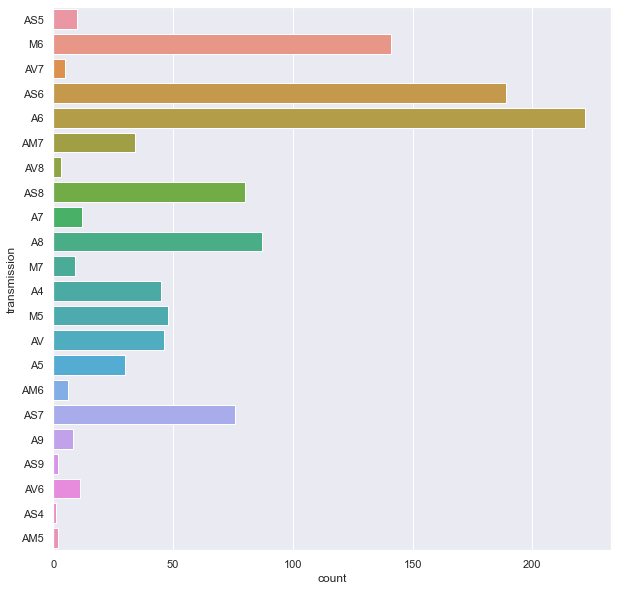

In [28]:
# Checking the  transmission type  
sns.set()
plt.figure(figsize = (10,10))
sns.countplot(y= df["transmission"])
plt.show()

In [30]:
temp1 =  df.groupby("fueltype")["co2emissions"].mean().reset_index()

Average CO2 Emission Per fuel type


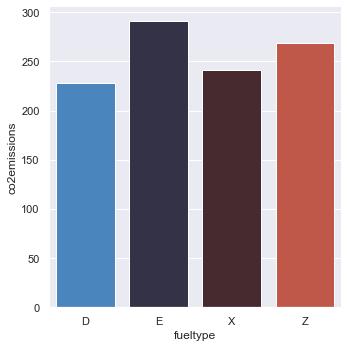

In [31]:
sns.set()
print("Average CO2 Emission Per fuel type")
g = sns.catplot(x ="fueltype", y ="co2emissions", data = temp1, kind = "bar", palette="icefire")
plt.show()

The Fuel type E emittes the most CO2


In [32]:
temp3 = round(df.groupby("vehicleclass")["co2emissions"].mean().reset_index(), 2)

Average CO2 Emission per vehicle_class 


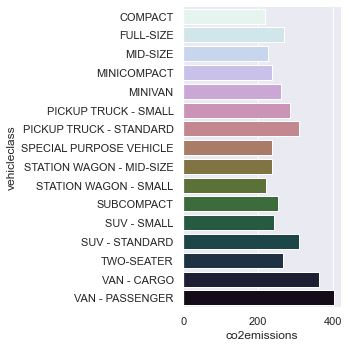

In [33]:
sns.set()
print("Average CO2 Emission per vehicle_class ")
g = sns.catplot(y ="vehicleclass", x ="co2emissions", data = temp3, kind = "bar", palette="cubehelix_r")
plt.show()
